In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Define lists of possible values
genders = ['male', 'female']
ethnicities = ['group A', 'group B', 'group C', 'group D', 'group E']
education_levels = ["high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]
lunch_types = ['standard', 'free/reduced']
test_preparations = ['none', 'completed']

# Random seed for reproducibility
np.random.seed(42)

# Number of rows to generate
n_rows = 1000000

# Generate random columns
data = {
    'gender': np.random.choice(genders, n_rows),
    'race/ethnicity': np.random.choice(ethnicities, n_rows),
    'parental level of education': np.random.choice(education_levels, n_rows),
    'lunch': np.random.choice(lunch_types, n_rows),
    'test preparation course': np.random.choice(test_preparations, n_rows),
    'math score': np.random.randint(0, 101, n_rows),
    'reading score': np.random.randint(0, 101, n_rows),
    'writing score': np.random.randint(0, 101, n_rows)
}

# Create DataFrame
df_synthetic = pd.DataFrame(data)

# Save the synthetic data
df_synthetic.to_csv('synthetic_students_performance.csv', index=False)
print("✅ Synthetic data saved as 'synthetic_students_performance.csv'")


✅ Synthetic data saved as 'synthetic_students_performance.csv'


### Merge the two files

In [5]:
# Load both CSV files
df_original = pd.read_csv(r"C:\sachin\Python\Final_Code\pass_p\StudentsPerformance.csv")
df_synthetic = pd.read_csv(r"C:\sachin\Python\Final_Code\pass_p\synthetic_students_performance.csv")

# Merge the data (append rows)
df = pd.concat([df_original, df_synthetic], ignore_index=True)

# Save merged result
df.to_csv('merged_students_performance.csv', index=False)

print("✅ Merged file saved as 'merged_students_performance.csv'")


✅ Merged file saved as 'merged_students_performance.csv'


In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001000 entries, 0 to 1000999
Data columns (total 8 columns):
 #   Column                       Non-Null Count    Dtype 
---  ------                       --------------    ----- 
 0   gender                       1001000 non-null  object
 1   race/ethnicity               1001000 non-null  object
 2   parental level of education  1001000 non-null  object
 3   lunch                        1001000 non-null  object
 4   test preparation course      1001000 non-null  object
 5   math score                   1001000 non-null  int64 
 6   reading score                1001000 non-null  int64 
 7   writing score                1001000 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 61.1+ MB


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Check the outlier

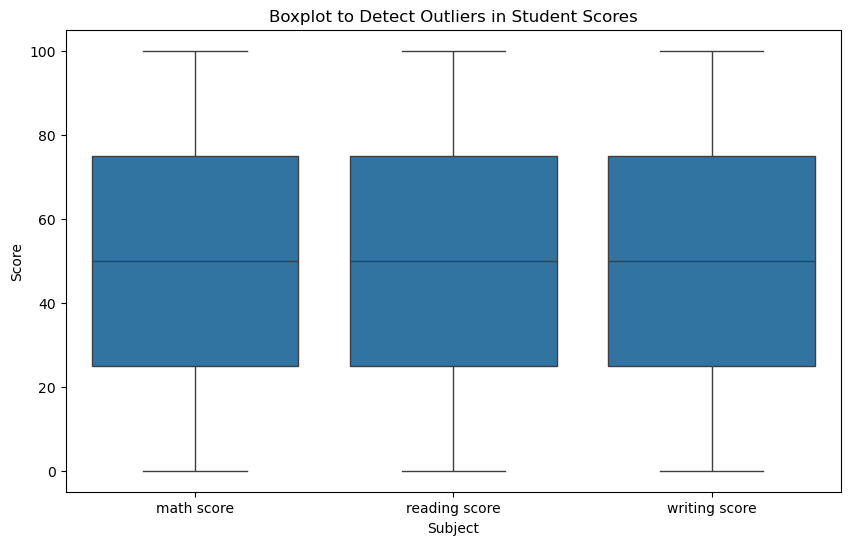

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of score columns
score_cols = ['math score', 'reading score', 'writing score']

# Melt the DataFrame
df_melted = df[score_cols].melt(var_name='Subject', value_name='Score')

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Subject', y='Score', data=df_melted)
plt.title('Boxplot to Detect Outliers in Student Scores')
plt.show()


In [10]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                     101
reading score                  101
writing score                  101
dtype: int64

### Lavel encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

# Apply label encoding to each column separately
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Store encoder for inverse_transform if needed


In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75


In [13]:
# Use original (unscaled) scores to calculate pass/fail
df['average'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['pass'] = df['average'].apply(lambda x: 1 if x >= 57 else 0)
df.drop(columns='average', inplace=True)

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass
0,0,1,1,1,1,72,72,74,1
1,0,2,4,1,0,69,90,88,1
2,0,1,3,1,1,90,95,93,1
3,1,0,0,0,1,47,57,44,0
4,1,2,4,1,1,76,78,75,1


In [15]:
df.nunique()

gender                           2
race/ethnicity                   5
parental level of education      6
lunch                            2
test preparation course          2
math score                     101
reading score                  101
writing score                  101
pass                             2
dtype: int64

### Scaling the data 

In [16]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the score columns
df[['math score', 'reading score', 'writing score']] = scaler.fit_transform(df[['math score', 'reading score', 'writing score']])

In [17]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'pass'],
      dtype='object')

### Feature Selection

In [18]:
X = df.drop(columns=['pass'])  
y = df['pass']

### Train test split

In [19]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
# Initialize the model
model_lr = LogisticRegression(max_iter=1000)
# Fit the model
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Cofusion matrix 

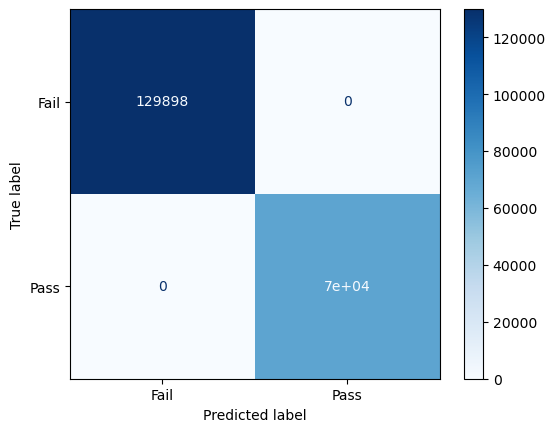

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = model_lr.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')


In [224]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Make predictions
y_pred = model_lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report (full summary)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

        Fail       1.00      1.00      1.00    129898
        Pass       1.00      1.00      1.00     70302

    accuracy                           1.00    200200
   macro avg       1.00      1.00      1.00    200200
weighted avg       1.00      1.00      1.00    200200



### K - Nearest Neighbors 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Initialize the KNN model      
knn_model = KNeighborsClassifier(n_neighbors=5)
# Fit the KNN model
knn_model.fit(X_train, y_train)

In [ ]:
# Predict using the KNN model
y_pred = knn_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')


In [ ]:
# Make predictions
y_pred = knn_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report (full summary)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
# Fit the model 
model_dt.fit(X_train, y_train)

In [ ]:
# Predict using the KNN model
y_pred = model_dt.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')

In [ ]:
# Make predictions
y_pred = model_dt.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report (full summary)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))


### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest model    
model_rf = RandomForestClassifier(random_state=42)
# Fit the model
model_rf.fit(X_train, y_train)

In [ ]:
# Predict using the KNN model
y_pred = model_rf.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')

In [ ]:
# Make predictions
y_pred = model_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report (full summary)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))


### Gradient Boosting 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting model
model_gb = GradientBoostingClassifier(random_state=42)
# Fit the model
model_gb.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model_gb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report (full summary)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))


In [ ]:
# Predict using the KNN model
y_pred = model_gb.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')

### XGBoost

In [ ]:
from xgboost import XGBClassifier
# Initialize the XGBoost model
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# Fit the model
model_xgb.fit(X_train, y_train)

In [ ]:
# Predict using the KNN model
y_pred = model_xgb.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fail", "Pass"])
disp.plot(cmap='Blues')

In [ ]:
# Make predictions
y_pred = model_xgb.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

# Classification Report (full summary)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Fail", "Pass"]))


### Save the best model

In [225]:
import joblib

# Save the best model (e.g., XGBoost)
joblib.dump(model_xgb, 'best_student_pass_fail_model.pkl')


['best_student_pass_fail_model.pkl']